In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aerofit-treadmill/aerofit_treadmill.csv


In [2]:
#Import Packages
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# K-Nearest Neighbors Classification 

In today's fast-paced world, maintaining a healthy lifestyle is paramount. Some people have a membership at a local fitness center. Others prefer to do some exercises at home. For them, the journey begins with choosing the right fitness equipment. As an enthusiast of fitness and personal well-being, I embark on a data-driven exploration into the world of treadmills. My goal is to build a supervised learning classification model with K-Nearest Neighbor. The data in this dataset is labeled. Each buyer has some characteristics, and finally, the outcome is selecting a treadmill. First of all, I catch a glimpse of the data.

In [3]:
#import dataset
path = '/kaggle/input/aerofit-treadmill/aerofit_treadmill.csv'

df = pd.read_csv(path)

In [4]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [5]:
df.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [6]:
df.shape

(180, 9)

In [7]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
#Data preparation
print(df.Product.unique())
print(df.Gender.unique())
print(df.MaritalStatus.unique())

['KP281' 'KP481' 'KP781']
['Male' 'Female']
['Single' 'Partnered']


In [10]:
#missing values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No values are missing in this dataset. The dataset has 9 columns with 180 observations of each customer that buys a threadmill. There are 3 types of threadmills which can be bought: threadmill KP281, threadmill KP481, and threadmill KP781.

# Data Preparation

Now, I prepare the data to build the supervised classification model with ML. All categorical variables should be converted into numerical values. Then, I explore the relationships between the variables using a pairplot. 

In [11]:
#replacing text values
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0,'Partnered':1})

df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,1,14,0,3,4,29562,112
1,KP281,19,1,15,0,2,3,31836,75
2,KP281,19,0,14,1,4,3,30699,66
3,KP281,19,1,12,0,3,3,32973,85
4,KP281,20,1,13,1,4,2,35247,47


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

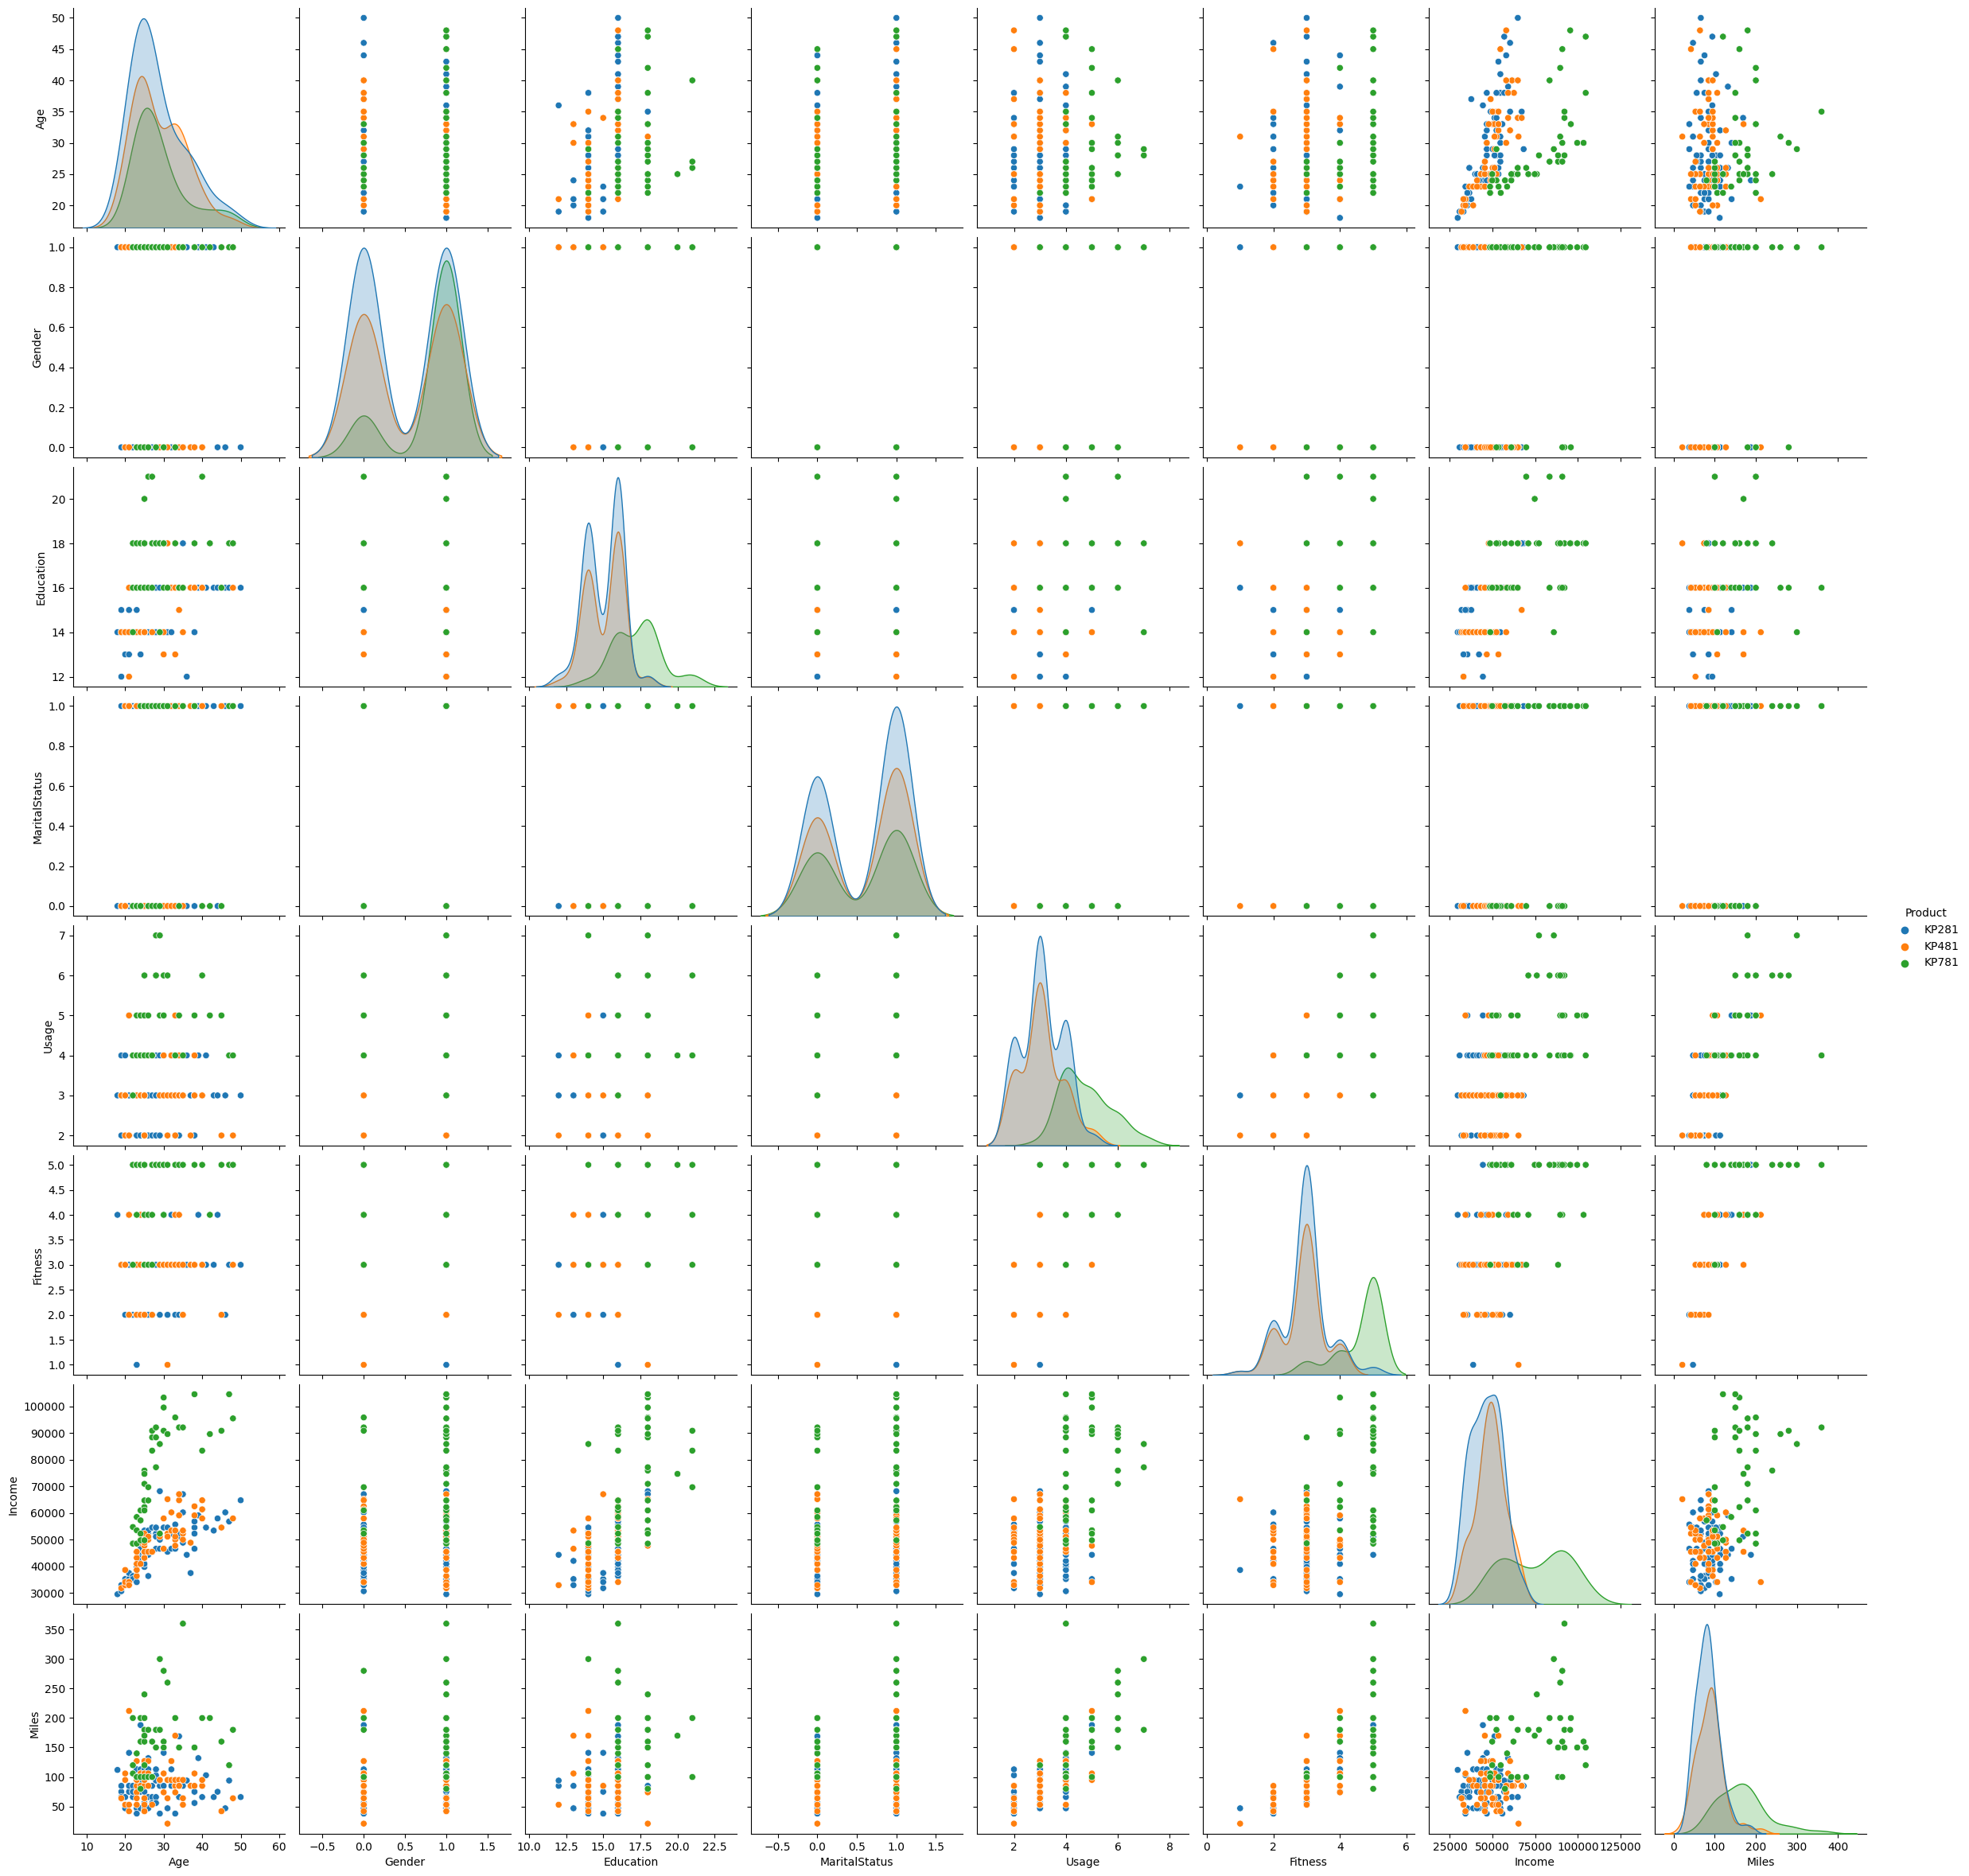

In [12]:
sns.pairplot(df, hue='Product', height=3);
plt.show()

When I look at age, the variable has a right-skewed distribution. Most people in this dataset are approximately younger than 30 years old. If I look at the percentile at the data descriptives in the previous section, 75% is younger than 33 years old. Very few people have more than 20 years of education. It looks like that poeple with higher fitness level, level 5, will buy threadmill KP781, not depending on the number of miles. Most people run less than 150 miles. If you run more than 150 miles, also threadmill KP781 is the best option. Most people that earn between 30,000 dollars and 40,000 dollars buy threadmill KP281 or KP481. Also, KP781 seems popular among males, but lots of females with high education levels buy the KP781.

I have not yet converted the product to a numerical value. Else, product would have been displayed in the pairplot as a feature and not as a label. Let's say threadmill KP281 is a 0, KP481 is a 1, and KP781 is a 2. All buyer characteristics are independent variables: age, gender, education, marital status, usage, fitness, income, and miles. The dependent variable is product.

In [13]:
#replacing text values
df['Product'] = df['Product'].map({'KP281':0,'KP481':1,'KP781':2})

In [14]:
#Select the dependent and independent variable
X = df[['Age','Gender','Education','MaritalStatus','Usage','Fitness','Income','Miles']]
Y = df['Product'].values

In [15]:
X[0:5]

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,18,1,14,0,3,4,29562,112
1,19,1,15,0,2,3,31836,75
2,19,0,14,1,4,3,30699,66
3,19,1,12,0,3,3,32973,85
4,20,1,13,1,4,2,35247,47


[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Gender'),
 Text(2.5, 0, 'Education'),
 Text(3.5, 0, 'MaritalStatus'),
 Text(4.5, 0, 'Usage'),
 Text(5.5, 0, 'Fitness'),
 Text(6.5, 0, 'Income'),
 Text(7.5, 0, 'Miles')]

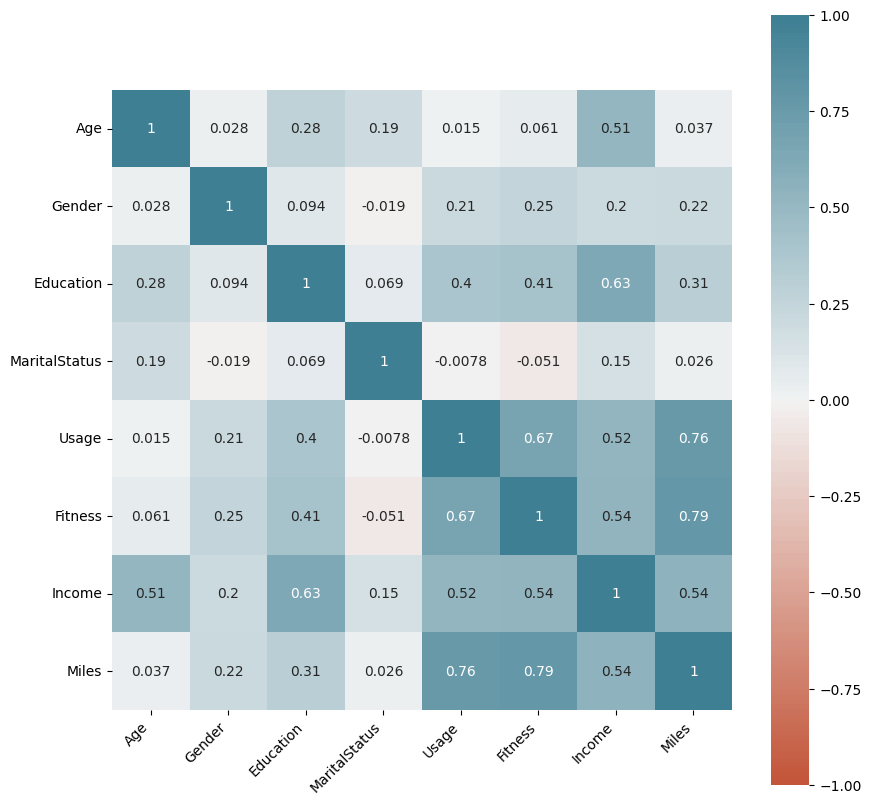

In [16]:
#correlation of variables: correlation diagram
fig, ax = plt.subplots(figsize=(10,10))
corr = X.corr()

ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

Looking at the correlation plot, most variables are positively correlated with each other. Miles, usage, and fitness level are strongly correlated with each other. When the usage increases, a person runs more miles. Additionally, people with a higher income have a higher usage. And people with a higher level of fitness run more miles and have more usage.

In [17]:
#Normalizing the data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.55814595,  0.85485041, -0.97498718, -1.21068304, -0.42111683,
         0.72044335, -1.46758505,  0.17025654],
       [-1.41372459,  0.85485041, -0.35485399, -1.21068304, -1.34551962,
        -0.32536151, -1.32943841, -0.54514318],
       [-1.41372459, -1.1697953 , -0.97498718,  0.82598002,  0.50328596,
        -0.32536151, -1.39851173, -0.71915932],
       [-1.41372459,  0.85485041, -2.21525355, -1.21068304, -0.42111683,
        -0.32536151, -1.26036508, -0.3517919 ],
       [-1.26930324,  0.85485041, -1.59512036,  0.82598002,  0.50328596,
        -1.37116637, -1.12221843, -1.08652674]])

Before I start with the classification analysis, I normalize the data first. Data normalization in Machine Learning is important. Normalization ensures that all features contribute equally to the learning process, preventing bias towards certain features. Also, it makes it easier to interpret the coefficients. Normalization can lead to faster convergence, higher accuracy, and better generalization performance of the models.

# Classification Analysis

After data normalization, I split the dataset into a train and test set. Splitting the dataset into a training set and a test set is essential for assessing model performance, preventing overfitting, tuning hyperparameters, enabling fair comparisons between models, and ensuring the integrity of the evaluation process in machine learning tasks. I pick a test size of 25% of the data. The dataset is not quite large, but I want to have enough 'test' data. The data is labeled. So, I use K-Nearest Neighbor Classification. K-Nearest Neigbor Classification is a supervised machine learning technique. I select the number of neighbors with the highest accuracy.

In [18]:
#split the data in a train and test set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=0)
print ('The length of the train set is:', X_train.shape,  Y_train.shape)
print ('The lenth of the test set equals:', X_test.shape,  Y_test.shape)

The length of the train set is: (135, 8) (135,)
The lenth of the test set equals: (45, 8) (45,)


Text(0, 0.5, 'Accuracy Score')

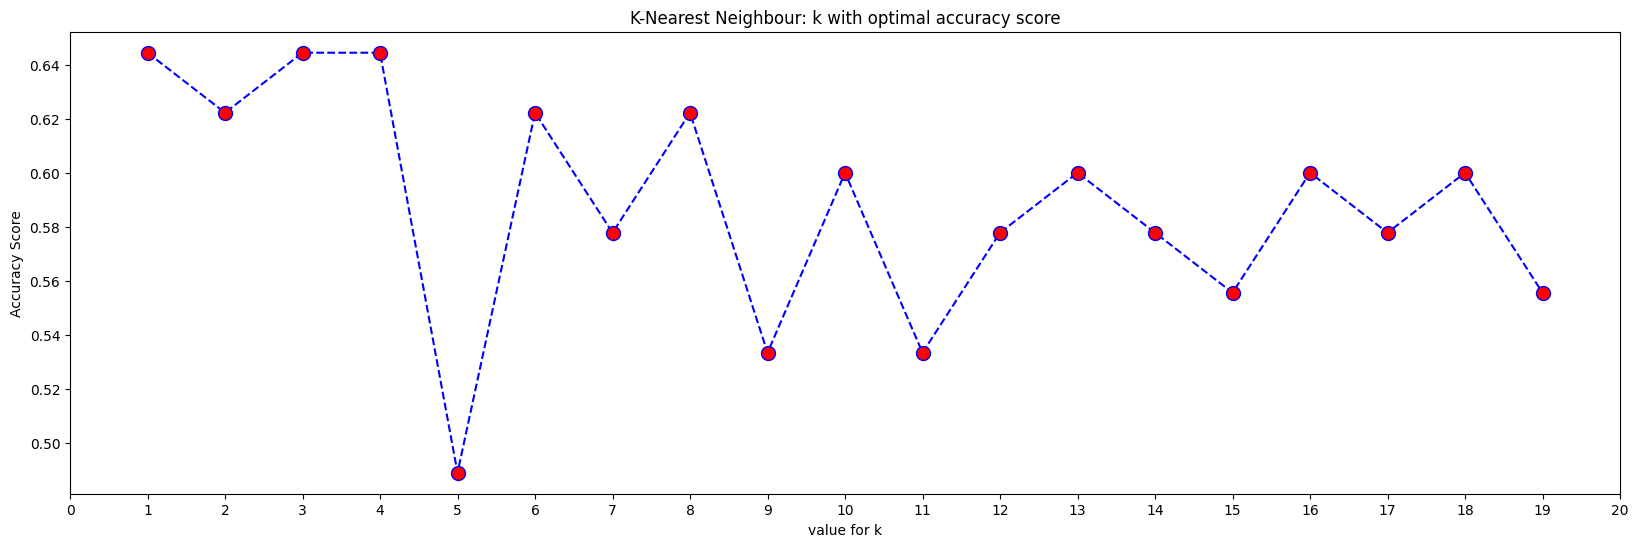

In [19]:
neighbors = range(1, 20) 
scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train, Y_train) 
    scores.append(knn.score(X_test, Y_test))
    
plt.figure(figsize=(20,6))
plt.plot(neighbors,scores,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title("K-Nearest Neighbour: k with optimal accuracy score")
plt.xlabel("value for k")
plt.ylabel("Accuracy Score")

In [20]:
print(scores)

[0.6444444444444445, 0.6222222222222222, 0.6444444444444445, 0.6444444444444445, 0.4888888888888889, 0.6222222222222222, 0.5777777777777777, 0.6222222222222222, 0.5333333333333333, 0.6, 0.5333333333333333, 0.5777777777777777, 0.6, 0.5777777777777777, 0.5555555555555556, 0.6, 0.5777777777777777, 0.6, 0.5555555555555556]


Looking at the results, there are multiple values for k with the highest accuracy score. Let's pick 3.

In [21]:
#Classification Model:
neighborclass = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
knn_model = neighborclass.fit(X_train,Y_train)


In [22]:
knn_ypred = knn_model.predict(X_test)
knn_ypred

array([1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0])

In [23]:
from sklearn.metrics import f1_score

# Calculate F1-score
f1 = f1_score(Y_test, knn_ypred, average='weighted')

print("F1-score:", f1)

F1-score: 0.6370882073009734


In [24]:
#Accuracy of the model and confusion matrix
# Calculate accuracy
accuracy = accuracy_score(Y_test, knn_ypred)
print("Accuracy:", accuracy)

Accuracy: 0.6444444444444445


Confusion Matrix:
[[16  3  1]
 [ 8  5  0]
 [ 3  1  8]]


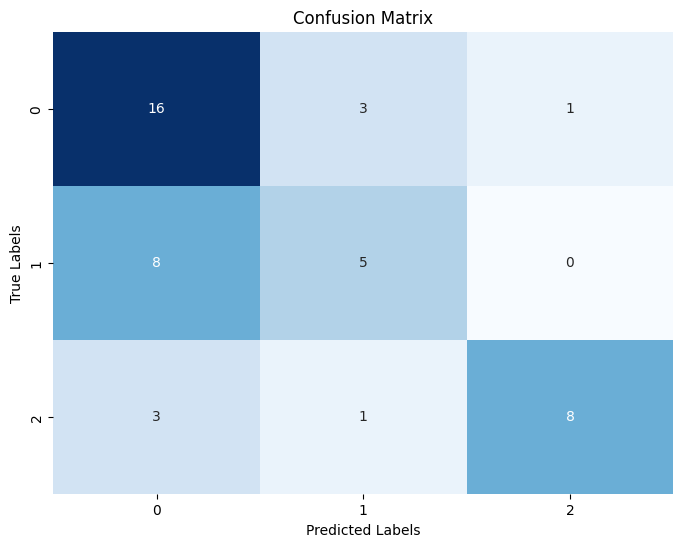

In [25]:
# Create confusion matrix
conf_matrix = confusion_matrix(Y_test, knn_ypred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The accuracy and F1 score of the model is not really high. A F1 score of 0.63 indicates that the model has achieved a moderate level of performance in terms of both precision and sensitivity. Also, the accuracy score equals 0.644. An accuracy score of 0.64 means that the model correctly predicts 64% of the instances in the dataset. When you look at the confusion matrix, that is true, because in 11 out of 27 instances, the predicted label is different than the true label (the true label is threadmill KP281 but the predicted label is threadmill KP481 or KP781). For threadmill KP781, the label is most accurately predicted. 

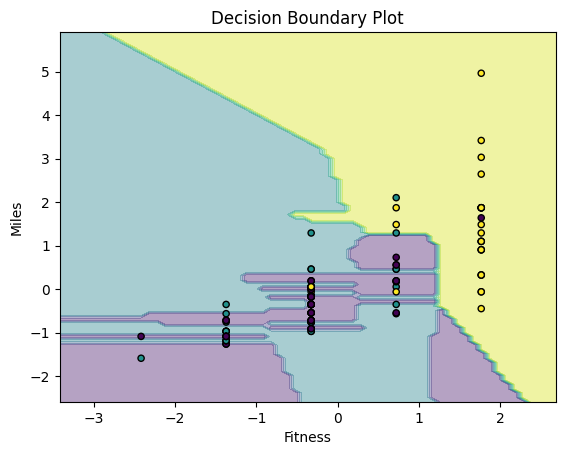

In [26]:
# Extract 'Fitness' and 'Miles' columns for training data
X_train_subset = X_train[:, [5, 7]]  # Fitness is at index 5, Miles is at index 7

nbclass = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
knn_model_second = nbclass.fit(X_train_subset,Y_train)

# Generate a mesh grid of 'Fitness' and 'Miles' values
x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


# Predict the class for each point in the mesh grid
Z = knn_model_second.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=.4)
plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=Y_train, s=20, edgecolor='k')
plt.xlabel('Fitness')
plt.ylabel('Miles')
plt.title('Decision Boundary Plot')
plt.show()


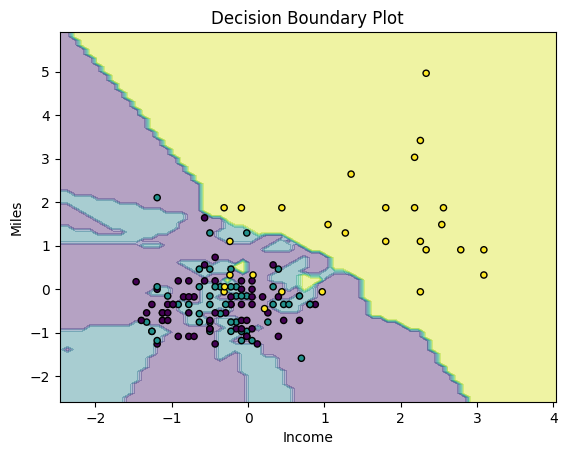

In [27]:
# Extract 'Income' and 'Miles' columns for training data
X_train_subset = X_train[:, [6, 7]]  # Income is at index 6, Miles is at index 7

nbclass = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
knn_model_third = nbclass.fit(X_train_subset,Y_train)

# Generate a mesh grid of 'Income' and 'Miles' values
x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


# Predict the class for each point in the mesh grid
Z = knn_model_third.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=.4)
plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=Y_train, s=20, edgecolor='k')
plt.xlabel('Income')
plt.ylabel('Miles')
plt.title('Decision Boundary Plot')
plt.show()


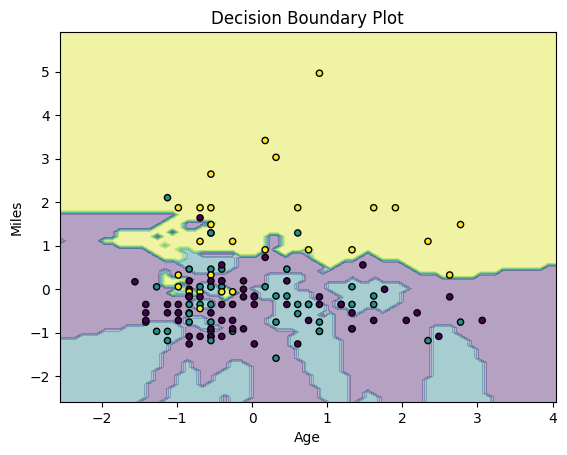

In [28]:
# Extract 'age' and 'Miles' columns for training data
X_train_subset = X_train[:, [0, 7]]  # Income is at index 6, Miles is at index 7

nbclass = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
knn_model_four = nbclass.fit(X_train_subset,Y_train)

# Generate a mesh grid of 'Age' and 'Miles' values
x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


# Predict the class for each point in the mesh grid
Z = knn_model_four.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=.4)
plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=Y_train, s=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Miles')
plt.title('Decision Boundary Plot')
plt.show()

In cases people run more miles or have a higher level of fitness, they definitely pick the threadmill that represents the yellow class. In the other regions, they are indifferent and pick either green or blue. Each area has some outliers.

# Make a Prediction

Lastly, let's make a prediction with an example of new data. Let's predict the threadmill the person is going to buy. Suppose that the person is 30 years in age. The person is a female, has 20 years of education, and the person is married. The person uses the threadmill 3 times a week and has a moderate level of fitness. Also, the person earns 45000 dollars and runs 25 miles.

In [29]:
# Example new data (replace these values with your own)
new_data = [[30, 0, 20, 1, 3, 3, 45000, 25]]

#normalize new data
new_data_normalized = preprocessing.StandardScaler().fit(new_data).transform(new_data)


In [30]:
# Make predictions
new_predictions = knn_model.predict(new_data)

print("Predictions for new data:", new_predictions)


Predictions for new data: [2]


And the outcome for this person is to buy threadmill KP781. Looking at the pairplot, most people with a higher number of years of education buy this threadmill. Also, people with more education and moderate fitness levels tend to buy the KP781. Contrary, other threadmills are more popular among people that run fewer miles and use the threadmill less than 3 times a week. The KNN-classification model does not really have a high accuracy score. 

**Thanks for opening this notebook!**